In [33]:
import pandas as pd

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import pickle


In [34]:
test = pd.read_csv('../data/clean/test.csv')
train = pd.read_csv('../data/clean/train.csv')
test.shape, train.shape

((418, 13), (891, 14))

In [35]:
FEATURES = list(train.columns[:-2])
FEATURES

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Miss',
 'Mr',
 'Mrs',
 'Rare',
 'male']

In [36]:
result_dict = {}
models = {}

In [37]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {'accuracy': round(acc,2), 
            'precision': round(prec,2),
            'recall':round(recall,2), 
            'accuracy_count':num_acc}

In [38]:
def build_model(classifier_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
       
    model = classifier_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)

    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    
    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

        
    models[classifier_fn.__name__] = model
    
    return {'training': train_summary, 
            'test': test_summary,
            'confusion_matrix': model_crosstab}

In [39]:
def compare_results():
    for key in result_dict:
        print('Classification: ', key)

        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
       
        print()

In [40]:
def logistic_fn(x_train, y_train):
    
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)

    return model

In [41]:
result_dict['survived ~ logistic'] = build_model(logistic_fn,
                                              'Survived',
                                               FEATURES,
                                               train)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179



In [42]:
def linear_discriminant_fn(x_train, y_train, solver='svd'):
    
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train, y_train)
    
    return model

In [43]:
result_dict['survived ~ linear_discriminant_analysis'] = build_model(linear_discriminant_fn,
                                                                 'Survived',
                                                                  FEATURES,
                                                                  train)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.83
precision 0.8
recall 0.74
accuracy_count 593

Test data
accuracy 0.84
precision 0.85
recall 0.75
accuracy_count 150



In [44]:
def sgd_fn(x_train, y_train, max_iter=1000, tol=1e-3):
    
    model = SGDClassifier(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
     
    return model

In [45]:
result_dict['survived ~ sgd'] = build_model(sgd_fn,
                                           'Survived',
                                            FEATURES,
                                            train)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.83
precision 0.8
recall 0.74
accuracy_count 593

Test data
accuracy 0.84
precision 0.85
recall 0.75
accuracy_count 150

Classification:  survived ~ sgd

Training data
accuracy 0.53
precision 0.44
recall 1.0
accuracy_count 374

Test data
accuracy 0.54
precision 0.49
recall 0.97
accuracy_count 97



In [46]:
def linear_svc_fn(x_train, y_train, C=1.0, max_iter=1000, tol=1e-3):
    
    model = LinearSVC(C=C, max_iter=max_iter, tol=tol, dual=False)
    model.fit(x_train, y_train) 
    
    return model

In [47]:
result_dict['survived ~ linear_svc'] = build_model(linear_svc_fn,
                                                  'Survived',
                                                   FEATURES,
                                                   train)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.83
precision 0.8
recall 0.74
accuracy_count 593

Test data
accuracy 0.84
precision 0.85
recall 0.75
accuracy_count 150

Classification:  survived ~ sgd

Training data
accuracy 0.53
precision 0.44
recall 1.0
accuracy_count 374

Test data
accuracy 0.54
precision 0.49
recall 0.97
accuracy_count 97

Classification:  survived ~ linear_svc

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179



In [48]:
def radius_neighbor_fn(x_train, y_train, radius=40.0):

    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train, y_train) 
    
    return model

In [49]:
result_dict['survived ~ radius_neighbors'] = build_model(radius_neighbor_fn,
                                                         'Survived',
                                                         FEATURES,
                                                         train)
compare_results()

Classification:  survived ~ logistic

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.83
precision 0.8
recall 0.74
accuracy_count 593

Test data
accuracy 0.84
precision 0.85
recall 0.75
accuracy_count 150

Classification:  survived ~ sgd

Training data
accuracy 0.53
precision 0.44
recall 1.0
accuracy_count 374

Test data
accuracy 0.54
precision 0.49
recall 0.97
accuracy_count 97

Classification:  survived ~ linear_svc

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179

Classification:  survived ~ radius_neighbors

Training data
accuracy 0.62
precision 0.51
recall 0.11
accuracy_count 440

Test data
accuracy 0.59
precision 0.36
recall 0.07
accuracy_count 106



In [50]:
def decision_tree_fn(x_train, y_train, max_depth=None, max_features=None): 
    
    model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
    model.fit(x_train, y_train)
    
    return model

In [51]:
result_dict['survived ~ decision_tree'] = build_model(decision_tree_fn,
                                                 'Survived',
                                                  FEATURES,
                                                  train)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.83
precision 0.8
recall 0.74
accuracy_count 593

Test data
accuracy 0.84
precision 0.85
recall 0.75
accuracy_count 150

Classification:  survived ~ sgd

Training data
accuracy 0.53
precision 0.44
recall 1.0
accuracy_count 374

Test data
accuracy 0.54
precision 0.49
recall 0.97
accuracy_count 97

Classification:  survived ~ linear_svc

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179

Classification:  survived ~ radius_neighbors

Training data
accuracy 0.62
precision 0.51
recall 0.11
accuracy_count 440

Test data
accuracy 0.59
precision 0.36
recall 0.07
accuracy_count 106

Classification:  survived ~ decision_tree

Training data
accuracy 1.0


In [52]:
def naive_bayes_fn(x_train,y_train, priors=None):
    
    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)
    
    return model

In [53]:
result_dict['survived ~ naive_bayes'] = build_model(naive_bayes_fn,
                                                    'Survived',
                                                    FEATURES,
                                                    train)

compare_results()

Classification:  survived ~ logistic

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179

Classification:  survived ~ linear_discriminant_analysis

Training data
accuracy 0.83
precision 0.8
recall 0.74
accuracy_count 593

Test data
accuracy 0.84
precision 0.85
recall 0.75
accuracy_count 150

Classification:  survived ~ sgd

Training data
accuracy 0.53
precision 0.44
recall 1.0
accuracy_count 374

Test data
accuracy 0.54
precision 0.49
recall 0.97
accuracy_count 97

Classification:  survived ~ linear_svc

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 712

Test data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 179

Classification:  survived ~ radius_neighbors

Training data
accuracy 0.62
precision 0.51
recall 0.11
accuracy_count 440

Test data
accuracy 0.59
precision 0.36
recall 0.07
accuracy_count 106

Classification:  survived ~ decision_tree

Training data
accuracy 1.0


In [54]:
training_ac = {}
training_recall = {}
training_precision = {}

test_ac = {}
test_recall = {}
test_precision = {}

for key, val, in result_dict.items():
    for key2, val2 in val.items():
        for key3, val3 in val2.items():
            if key2 == 'training':
                if key3 == 'accuracy':
                    training_ac[key] = val3
                elif key3 == 'precision':
                    training_precision[key] = val3
                elif key3 == 'recall':
                    training_recall[key] = val3
            else:
                if key3 == 'accuracy':
                    test_ac[key] = val3
                elif key3 == 'precision':
                    test_precision[key] = val3
                elif key3 == 'recall':
                    test_recall[key] = val3
        

In [55]:
training_ac

{'survived ~ logistic': 1.0,
 'survived ~ linear_discriminant_analysis': 0.83,
 'survived ~ sgd': 0.53,
 'survived ~ linear_svc': 1.0,
 'survived ~ radius_neighbors': 0.62,
 'survived ~ decision_tree': 1.0,
 'survived ~ naive_bayes': 1.0}

In [56]:
training_ac

{'survived ~ logistic': 1.0,
 'survived ~ linear_discriminant_analysis': 0.83,
 'survived ~ sgd': 0.53,
 'survived ~ linear_svc': 1.0,
 'survived ~ radius_neighbors': 0.62,
 'survived ~ decision_tree': 1.0,
 'survived ~ naive_bayes': 1.0}

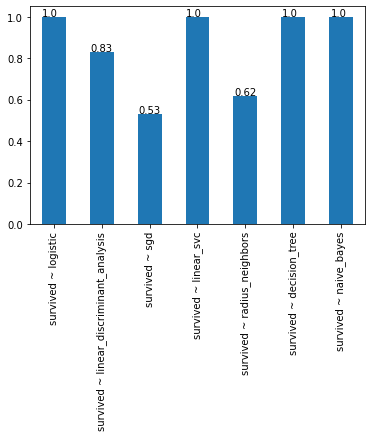

In [57]:
ax = pd.Series(training_ac).plot(kind='bar', label=True, include_bool=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


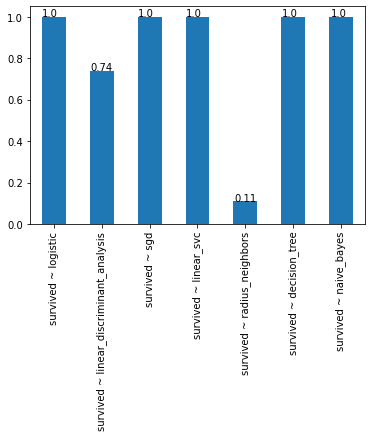

In [58]:
ax = pd.Series(training_recall).plot(kind='bar', label=True, include_bool=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

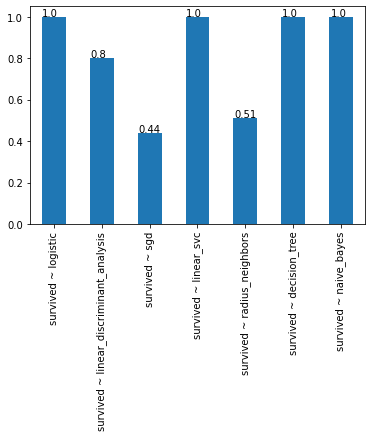

In [59]:
ax = pd.Series(training_precision).plot(kind='bar', label=True, include_bool=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

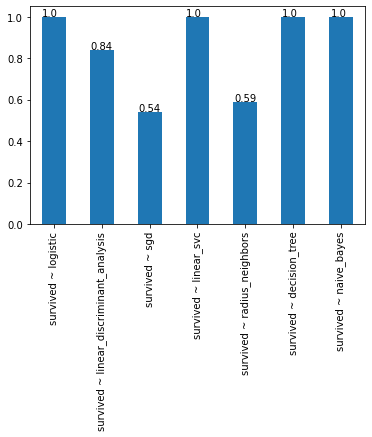

In [60]:
ax = pd.Series(test_ac).plot(kind='bar', label=True, include_bool=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

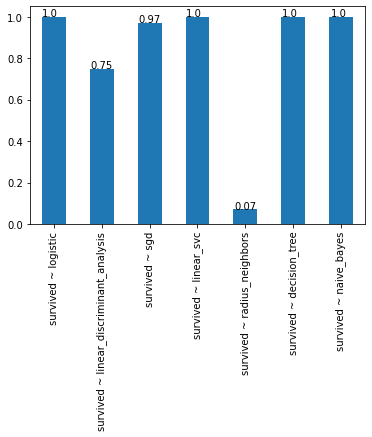

In [61]:
ax = pd.Series(test_recall).plot(kind='bar', label=True, include_bool=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

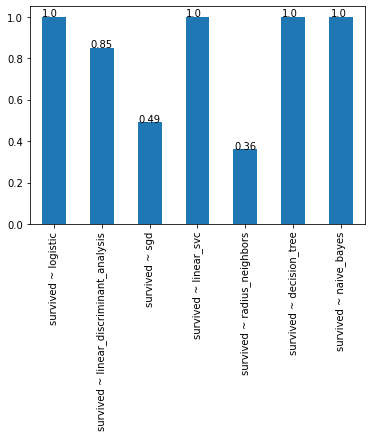

In [62]:
ax = pd.Series(test_precision).plot(kind='bar', label=True, include_bool=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [63]:
models

{'logistic_fn': LogisticRegression(solver='liblinear'),
 'linear_discriminant_fn': LinearDiscriminantAnalysis(),
 'sgd_fn': SGDClassifier(),
 'linear_svc_fn': LinearSVC(dual=False, tol=0.001),
 'radius_neighbor_fn': RadiusNeighborsClassifier(radius=40.0),
 'decision_tree_fn': DecisionTreeClassifier(),
 'naive_bayes_fn': GaussianNB()}

In [65]:
pickle.dump(models, open('../models/sklearn/all_models', 'wb'))